In [2]:
import numpy as np
import pandas as pd

In [3]:
train_data = pd.read_csv("train_data.txt",sep=":::",names=["Movie","Genre","Description"],engine="python")

In [4]:
train_data.head()

,Movie,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [5]:
train_data["Genre"].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [6]:
train_data.isnull().sum()

Movie          0
Genre          0
Description    0
dtype: int64

In [7]:
train_data.duplicated().sum()

0

In [8]:
train_data.describe()

,Movie,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [6]:
test_data = pd.read_csv("test_data.txt",sep=":::",names=["ID","Movie","Description"],engine="python")

In [7]:
test_data.head()

,ID,Movie,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [8]:
test_data.shape

(54200, 3)

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   Movie        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [12]:
test_data.duplicated().sum()

0

In [27]:
#data analysis

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

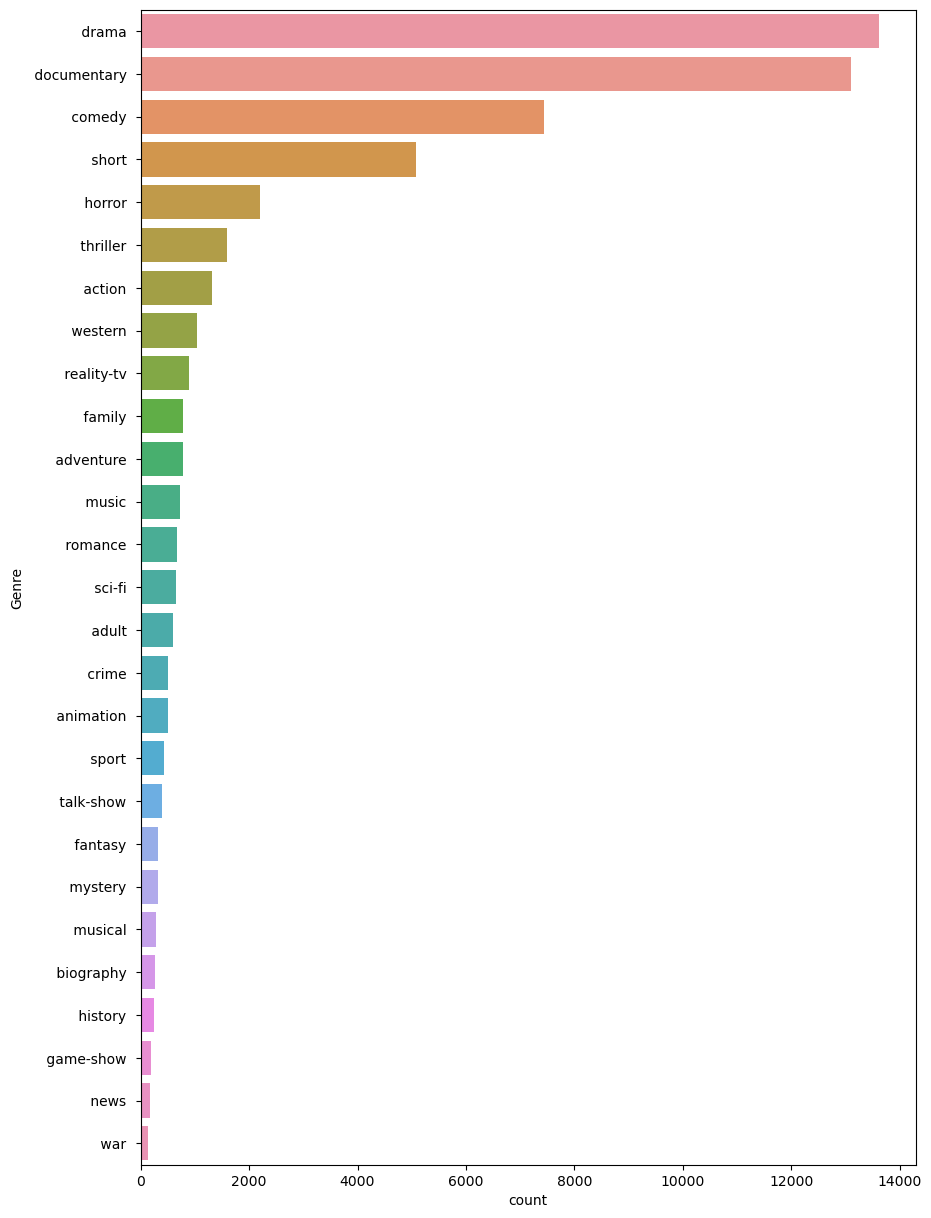

In [11]:
plt.figure(figsize=(10,15))
sns.countplot(data=train_data,y="Genre",order=train_data["Genre"].value_counts().index)
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
train_data["Genre"] = encoder.fit_transform(train_data["Genre"])

In [15]:
train_data["length"] = train_data["Description"].apply(len) 
train_data.head()

,Movie,Genre,Description,length
1,Oscar et la dame rose (2009),8,Listening in to a conversation between his do...,546
2,Cupid (1997),24,A brother and sister with a past incestuous r...,184
3,"Young, Wild and Wonderful (1980)",1,As the bus empties the students for their fie...,650
4,The Secret Sin (1915),8,To help their unemployed father make ends mee...,1082
5,The Unrecovered (2007),8,The film's title refers not only to the un-re...,625


In [16]:
test_data_sol = pd.read_csv("test_data_solution.txt",sep=":::",names=["Movie","Genre","Description"],engine="python")

In [17]:
test_data_sol.head()

,Movie,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [23]:
#Data Cleaning

In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re

In [20]:
train_data["Description"][1]

' Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.'

In [23]:
re.sub(pattern="[^a-zA-Z]",repl = " ",string=train_data["Description"][1])

' Listening in to a conversation between his doctor and parents     year old Oscar learns what nobody has the courage to tell him  He only has a few weeks to live  Furious  he refuses to speak to anyone except straight talking Rose  the lady in pink he meets on the hospital stairs  As Christmas approaches  Rose uses her fantastical experiences as a professional wrestler  her imagination  wit and charm to allow Oscar to live life and love to the full  in the company of his friends Pop Corn  Einstein  Bacon and childhood sweetheart Peggy Blue '

In [40]:
#text preprocessing

def transform_desc(description):
    # Step 1: Convert text to lowercase
    description = description.lower()
    
    # Step 2: Tokenize the text
    tokens = word_tokenize(description)
    
    tokens = [re.sub(r'\bhttps?:\/\/\S+\b', '', re.sub(r'[^a-zA-Z]', ' ', token)) for token in tokens if token.isalpha()]
    
    # Step 4: Remove stopwords and punctuation
    stop_words = set(stopwords.words("english"))
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    
    # Step 5: Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join the tokens back into a single string
    processed_text = " ".join(tokens)
    
    return processed_text


In [41]:
train_data["transform_descr"] = train_data["Description"].apply(transform_desc)

In [46]:
train_data["transform_descr"][1]

'listening conversation doctor parent oscar learns nobody courage tell week live furious refuse speak anyone except rose lady pink meet hospital stair christmas approach rose us fantastical experience professional wrestler imagination wit charm allow oscar live life love full company friend pop corn einstein bacon childhood sweetheart peggy blue'

In [48]:
train_data.drop(columns=["transform_desc"])

,Movie,Genre,Description,length,transform_descr
1,Oscar et la dame rose (2009),8,Listening in to a conversation between his do...,546,listening conversation doctor parent oscar lea...
2,Cupid (1997),24,A brother and sister with a past incestuous r...,184,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",1,As the bus empties the students for their fie...,650,bus empty student field trip museum natural hi...
4,The Secret Sin (1915),8,To help their unemployed father make ends mee...,1082,help unemployed father make end meet edith twi...
5,The Unrecovered (2007),8,The film's title refers not only to the un-re...,625,film title refers body ground zero also state ...
...,...,...,...,...,...
54210,"""Bonino"" (1953)",5,This short-lived NBC live sitcom centered on ...,507,nbc live sitcom centered bonino concert singer...
54211,Dead Girls Don't Cry (????),13,The NEXT Generation of EXPLOITATION. The sist...,781,next generation exploitation sister kapa bay s...
54212,Ronald Goedemondt: Ze bestaan echt (2008),7,"Ze bestaan echt, is a stand-up comedy about g...",255,ze bestaan echt comedy growing facing fear fre...
54213,Make Your Own Bed (1944),5,Walter and Vivian live in the country and hav...,642,walter vivian live country difficult time keep...


In [38]:
test_data["transform_desc"] = test_data["Description"].apply(transform_desc)

In [54]:
test_data.drop(columns=["tranform_desc"])

,ID,Movie,Description,transform_desc
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane love life car apartment job especially g...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherd north tran...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died spoken brother year serious cancer...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial art superstar br...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",covering multiple genre tale light dark anthol...
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,alice cora munro attempt find father british o...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,movie year making oliver twist artful dodger f...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",popular mysterious rock mike mallard askew bro...


In [55]:
train_data["tranform_lenght"] = train_data["transform_desc"].apply(len) 

In [19]:
train_data.head()

,Movie,Genre,Description,lenght,transform_desc
1,Oscar et la dame rose (2009),8,Listening in to a conversation between his do...,546,listening conversation doctor parent oscar lea...
2,Cupid (1997),24,A brother and sister with a past incestuous r...,184,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",1,As the bus empties the students for their fie...,650,bus empty student field trip museum natural hi...
4,The Secret Sin (1915),8,To help their unemployed father make ends mee...,1082,help unemployed father make end meet edith twi...
5,The Unrecovered (2007),8,The film's title refers not only to the un-re...,625,film title refers body ground zero also state ...


In [57]:
#model building

In [63]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=10000)
cv = CountVectorizer(max_features=10000,ngram_range=(1,2))

In [69]:
X = tfidf.fit_transform(train_data["transform_descr"])

In [70]:
y = train_data["Genre"].values

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape

(43371, 10000)

In [80]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
mnb = MultinomialNB(alpha=0.1)
rf = RandomForestClassifier(n_estimators=100,random_state=0)
knc = KNeighborsClassifier()
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)

In [73]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
y_pred
print(accuracy_score(y_pred,y_test))

0.5580558885917182


In [81]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test,y_pred))
#print(classification_report(y_val,y_pred))

0.49561929355344464


In [35]:
knc.fit(X_train,y_train)
y_pred = knc.predict(X_val)
print(accuracy_score(y_val,y_pred))
#print(classification_report(y_val,y_pred))

0.3800608687632574


In [79]:
etc.fit(X_train,y_train)
y_pred = etc.predict(X_test)
print(accuracy_score(y_test,y_pred))
#print(classification_report(y_val,y_pred))

0.5028128746656829
